<a href="https://colab.research.google.com/github/shashwat4868/ICC_Cricket_World_Cup_Analysis/blob/main/DV_Prj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ICC Cricket World Cup Analysis**

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
# Read and Store Data Set

Batsman_Data = pd.read_csv('/content/drive/MyDrive/DV_Database/Batsman_Data.csv')
Ground_Data = pd.read_csv('/content/drive/MyDrive/DV_Database/Ground_Averages.csv')
ODI_Scores_Data = pd.read_csv('/content/drive/MyDrive/DV_Database/ODI_Match_Totals.csv')
ODI_Results_Data = pd.read_csv('/content/drive/MyDrive/DV_Database/ODI_Match_Results.csv')
WC_Players_Data = pd.read_csv('/content/drive/MyDrive/DV_Database/WC_players.csv')
Bowler_Data = pd.read_csv('/content/drive/MyDrive/DV_Database/Bowler_data.csv')

## **Analysis of Pitches**

In [ ]:
Ground_Data.sample(6)

,Ground,Span,Mat,Won,Tied,NR,Runs,Wkts,Balls,Ave,RPO
31,"Grange Cricket Club, Raeburn Place, Edinburgh ...",2013-2019,12,10,0,2,5523,160,5884,34.51,5.63
79,"Rajiv Gandhi International Stadium, Uppal, Hyd...",2014-2019,2,2,0,0,963,25,1145,38.52,5.04
80,"Zahur Ahmed Chowdhury Stadium, Chattogram - Ba...",2014-2018,6,6,0,0,2872,74,3224,38.81,5.34
61,"Newlands, Cape Town - South Africa",2013-2019,7,7,0,0,3526,106,3847,33.26,5.49
94,"Amini Park, Port Moresby - P.N.G.",2017-2017,2,2,0,0,862,34,1145,25.35,4.51
55,Dubai International Cricket Stadium - U.A.E.,2013-2019,24,22,1,1,10333,352,12910,29.35,4.80


In [ ]:
ODI_Results_Data.head()

,Unnamed: 0,Result,Margin,BR,Toss,Bat,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
0,418,won,85 runs,NaN,lost,1st,v India,Kolkata,3 Jan 2013,ODI # 3315,Pakistan,7
1,692,lost,85 runs,NaN,won,2nd,v Pakistan,Kolkata,3 Jan 2013,ODI # 3315,India,6
2,419,lost,10 runs,NaN,lost,2nd,v India,Delhi,6 Jan 2013,ODI # 3316,Pakistan,7
3,693,won,10 runs,NaN,won,1st,v Pakistan,Delhi,6 Jan 2013,ODI # 3316,India,6
4,121,lost,107 runs,NaN,lost,2nd,v Australia,Melbourne,11 Jan 2013,ODI # 3317,SriLanka,8


In [ ]:
ODI_Scores_Data.head()

,Unnamed: 0,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
0,412,250,48.3,5.15,NaN,1,won,v India,Kolkata,3 Jan 2013,ODI # 3315,Pakistan,7
1,680,165,48.0,3.43,251.0,2,lost,v Pakistan,Kolkata,3 Jan 2013,ODI # 3315,India,6
2,413,157,48.5,3.21,168.0,2,lost,v India,Delhi,6 Jan 2013,ODI # 3316,Pakistan,7
3,681,167,43.4,3.82,NaN,1,won,v Pakistan,Delhi,6 Jan 2013,ODI # 3316,India,6
4,117,198,40.0,4.95,306.0,2,lost,v Australia,Melbourne,11 Jan 2013,ODI # 3317,SriLanka,8


From the above two csv files, we can understand that **ODI_Scores_Data** gives much information compared to other file. So I would like to proceed with **ODI_Scores_Data**.

In [ ]:
ODI_Scores_Data["Scores_ID"] = ODI_Scores_Data["Unnamed: 0"]
ODI_Scores_Data.drop(columns="Unnamed: 0",inplace=True)

Since we are focusing in England, Let's analyze the England pitches and conditions and results over their grounds.

In [ ]:
WC_venue_pitches = ["The Oval, London","Trent Bridge, Nottingham","Sophia Gardens, Cardiff","County Ground, Bristol","Rose Bowl, Southampton",
                    "County Ground, Taunton","Old Trafford, Manchester","Edgbaston, Birmingham","Headingley, Leeds","Lord's, London",
                    "Riverside Ground, Chester-le-Street"]

In [ ]:
# Total Grounds
WC_Ground_Stats = []
ODI_Grounds = ODI_Scores_Data.Ground
for i in ODI_Grounds:
    for j in WC_venue_pitches:
        if i in j:
            #print("i ; ",i,"--j : ",j)
            WC_Ground_Stats.append((i,j))

In [ ]:
Ground_names = dict(set(WC_Ground_Stats))
def Full_Ground_names(value):
    return Ground_names[value]
Ground_names

{'Birmingham': 'Edgbaston, Birmingham',
 'Bristol': 'County Ground, Bristol',
 'Cardiff': 'Sophia Gardens, Cardiff',
 'Chester-le-Street': 'Riverside Ground, Chester-le-Street',
 'Leeds': 'Headingley, Leeds',
 "Lord's": "Lord's, London",
 'Manchester': 'Old Trafford, Manchester',
 'Nottingham': 'Trent Bridge, Nottingham',
 'Southampton': 'Rose Bowl, Southampton',
 'The Oval': 'The Oval, London'}

Seems like there's no Data regardign ODI Matches in this Taunton Ground. So we can't analyze the stats of **County Ground, Taunton**.

In [ ]:
# Gather the data of all ODI's in these WC Venues
WC_Grounds_History = ODI_Scores_Data[ODI_Scores_Data.Ground.isin([Ground[0] for Ground in WC_Ground_Stats])]
WC_Grounds_History["Ground"] = WC_Grounds_History.Ground.apply(Full_Ground_names)
WC_Grounds_History.head()

,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start Date,Match_ID,Country,Country_ID,Scores_ID
74,231/5,46.5,4.93,228.0,2,won,v England,"Lord's, London",31 May 2013,ODI # 3360,Newzealad,5,557
75,227/9,50.0,4.54,NaN,1,lost,v New Zealand,"Lord's, London",31 May 2013,ODI # 3360,England,1,844
76,359/3,50.0,7.18,NaN,1,won,v England,"Rose Bowl, Southampton",2 Jun 2013,ODI # 3361,Newzealad,5,558
77,273,44.1,6.18,360.0,2,lost,v New Zealand,"Rose Bowl, Southampton",2 Jun 2013,ODI # 3361,England,1,845
78,253,46.3,5.44,288.0,2,lost,v England,"Trent Bridge, Nottingham",5 Jun 2013,ODI # 3362,Newzealad,5,559


So, now we have the data of matches that were played in WC venues. Now let's analyze the following things:

1.   How many WC teams have played in these venues before and what are they?
2.   Which Team has more Win Percentage in these Venues?
3.   Does Batting First helps winning in these Pitches?
4.   What should the captain opt for, when he wins the Toss?

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

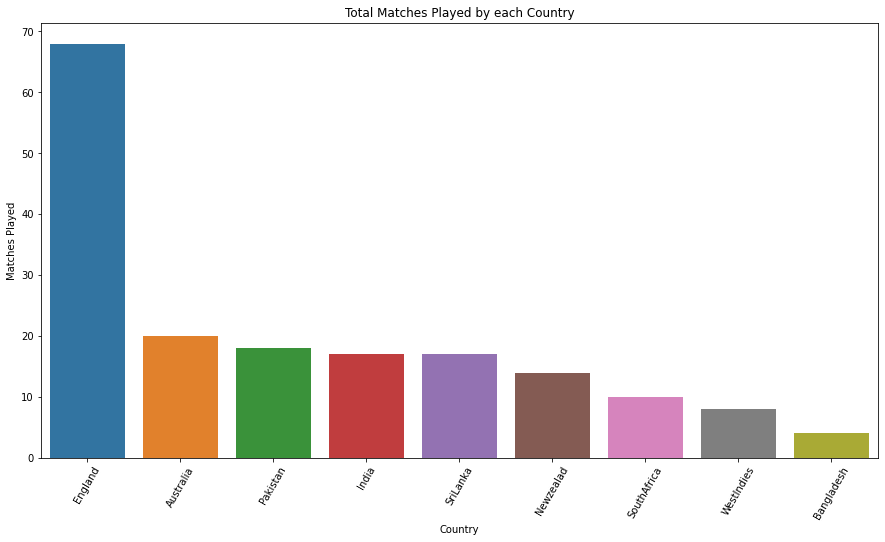

In [ ]:
# 1. How many WC teams have played in these venues before and what are they?
Team_Matches = WC_Grounds_History.Country.value_counts().reset_index()
plt.figure(figsize=(15,8))
sns.barplot(x = "index", y = "Country", data = Team_Matches).set_title("Total Matches Played by each Country")
plt.xlabel("Country")
plt.ylabel("Matches Played")
plt.xticks(rotation = 60)



1.   So, England has the benifit of Home conditions and even playing many matches over there, they will get used to those pitches and can understand the conditions of pitches very well.
2.   After England, it's Aussies which played many mathces in those conditions.



In [ ]:
WC_Grounds_History.sample(5)

,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start Date,Match_ID,Country,Country_ID,Scores_ID
907,322/3,48.4,6.61,322.0,2,won,v India,"The Oval, London",8 Jun 2017,ODI # 3882,SriLanka,8,232
878,328/6,50.0,6.56,NaN,1,won,v Ireland,"Lord's, London",7 May 2017,ODI # 3865,England,1,933
961,21/0,2.2,9.00,NaN,1,n/r,v West Indies,"Trent Bridge, Nottingham",21 Sep 2017,ODI # 3913,England,1,942
98,165,39.4,4.15,NaN,1,lost,v India,"Edgbaston, Birmingham",15 Jun 2013,ODI # 3372,Pakistan,7,424
100,159/8,24.0,6.62,170.0,2,lost,v England,"Sophia Gardens, Cardiff",16 Jun 2013,ODI # 3373,Newzealad,5,562


In [ ]:
WC_Grounds_History.Result.value_counts()

won     79
lost    77
n/r     14
tied     4
-        2
Name: Result, dtype: int64

In [ ]:
WC_Grounds_History = WC_Grounds_History[~WC_Grounds_History.Result.isin(["-"])]
WC_Grounds_History.Result.value_counts()

won     79
lost    77
n/r     14
tied     4
Name: Result, dtype: int64

In [ ]:
winnings = WC_Grounds_History[["Country","Result"]]
winnings["count"] = 1
Ground_Results_Per_Team = winnings.groupby(["Country","Result"]).aggregate(["sum"])
Ground_Results_Per_Team = Ground_Results_Per_Team.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()
Ground_Results_Per_Team.columns = ["Country","Result","Count"]
Ground_Results_Per_Team.head()

,Country,Result,Count
0,Australia,lost,55.0
1,Australia,n/r,20.0
2,Australia,won,25.0
3,Bangladesh,lost,50.0
4,Bangladesh,n/r,25.0


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

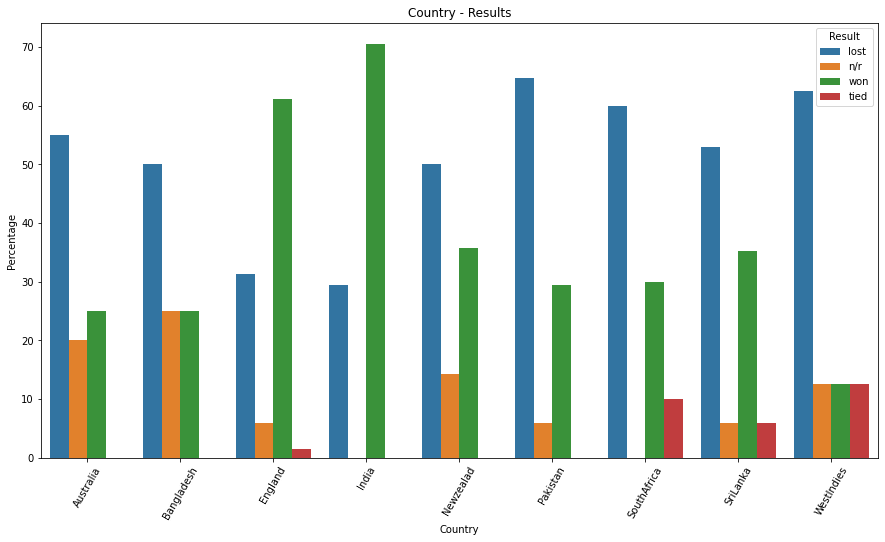

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x = "Country", y = "Count", hue = "Result", data = Ground_Results_Per_Team)
plt.ylabel("Percentage")
plt.title("Country - Results")
plt.xticks(rotation = 60)

From the above figure, we can understand that,

1. India and England have the highest winning percentage compared to that of other Nations
2. Pakistan, South Africa, West Indies have the Highest Losing Percentage.

Let's see what happens when the Top Two Teams face?

Text(0.5, 0, 'England')

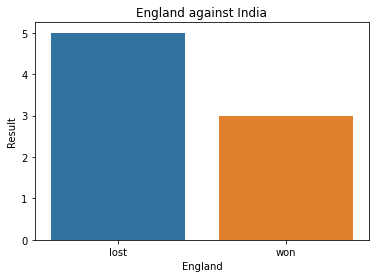

In [ ]:
India_vs_England = WC_Grounds_History[WC_Grounds_History.Country == "England"]\
[WC_Grounds_History.Opposition.str.contains("India")]
India_vs_England = India_vs_England.Result.value_counts().reset_index()
sns.barplot(x = "index", y = "Result", data = India_vs_England).set_title("England against India")
plt.xlabel("England")

### **Analyzing the Win and Lose Percentage based on Innings wrt Stadium**

In [ ]:
WC_Grounds_History.sample(5)

,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start Date,Match_ID,Country,Country_ID,Scores_ID
75,227/9,50.0,4.54,NaN,1,lost,v New Zealand,"Lord's, London",31 May 2013,ODI # 3360,England,1,844
889,328/5,50.0,6.56,331.0,2,lost,v England,"Rose Bowl, Southampton",27 May 2017,ODI # 3873,SouthAfrica,3,377
732,260/6,50.0,5.20,NaN,1,lost,v England,"Rose Bowl, Southampton",24 Aug 2016,ODI # 3770,Pakistan,7,492
1283,373/3,50.0,7.46,NaN,1,won,v Pakistan,"Rose Bowl, Southampton",11 May 2019,ODI # 4133,England,1,977
1094,268,49.5,5.37,NaN,1,lost,v India,"Trent Bridge, Nottingham",12 Jul 2018,ODI # 4014,England,1,962


Text(0, 0.5, 'Winning Percentage')

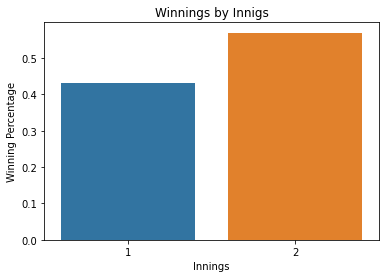

In [ ]:
Inning_Wins = WC_Grounds_History[WC_Grounds_History.Result == "won"].Inns.value_counts(normalize = True).reset_index()
sns.barplot(x = "index", y = "Inns", data = Inning_Wins).set_title("Winnings by Innigs")
plt.xlabel("Innings")
plt.ylabel("Winning Percentage")

So, from the above figure, we can understand that,

1. Those Teams which Bowl First has won around 55% of the matches.

Let's Divide them by Pitches and see the history

In [ ]:
Pitch_Innings = WC_Grounds_History[WC_Grounds_History.Result == "won"][["Inns","Ground"]]
Pitch_Innings["Count"] = 1
Pitch_Innings = Pitch_Innings.groupby(["Ground","Inns"]).sum()
Pitch_Innings = Pitch_Innings.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()
Pitch_Innings.columns = ["Ground", "Inns","Wins"]
Pitch_Innings.head( 5 )

,Ground,Inns,Wins
0,"County Ground, Bristol",1,33.333333
1,"County Ground, Bristol",2,66.666667
2,"Edgbaston, Birmingham",1,41.666667
3,"Edgbaston, Birmingham",2,58.333333
4,"Headingley, Leeds",1,40.000000


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

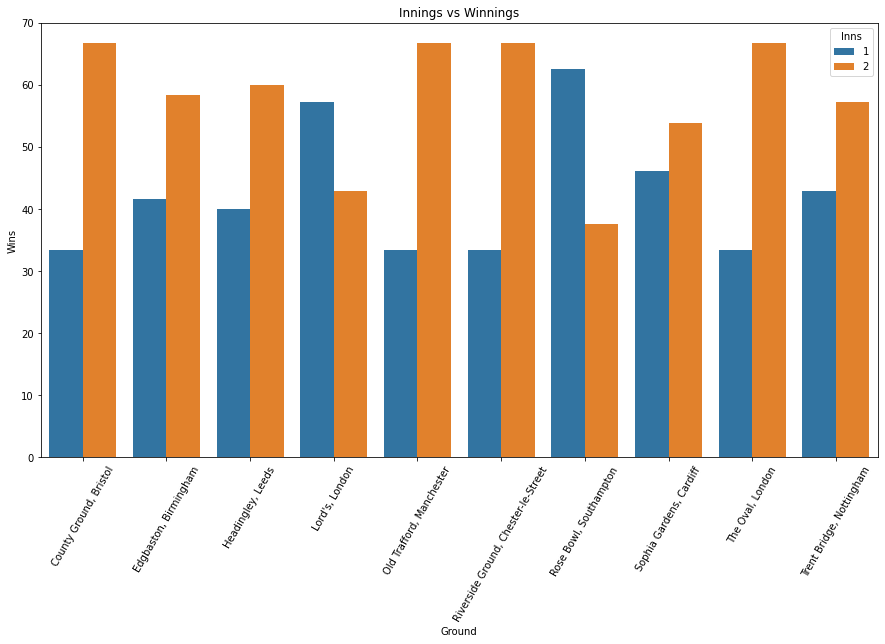

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x = "Ground", y = "Wins", hue = "Inns", data = Pitch_Innings).set_title("Innings vs Winnings")
plt.xticks(rotation = 60)

As we can see,

1.   Teams that Bat second will Win most of the times.

Now, Let's analyse the scores:

1.   If a Team Bats First, How much should it score to win majority of times?
2.   If a Team Bowls First, How much should the Bowling Team restrict the Runs?



Text(0, 0.5, 'Scores')

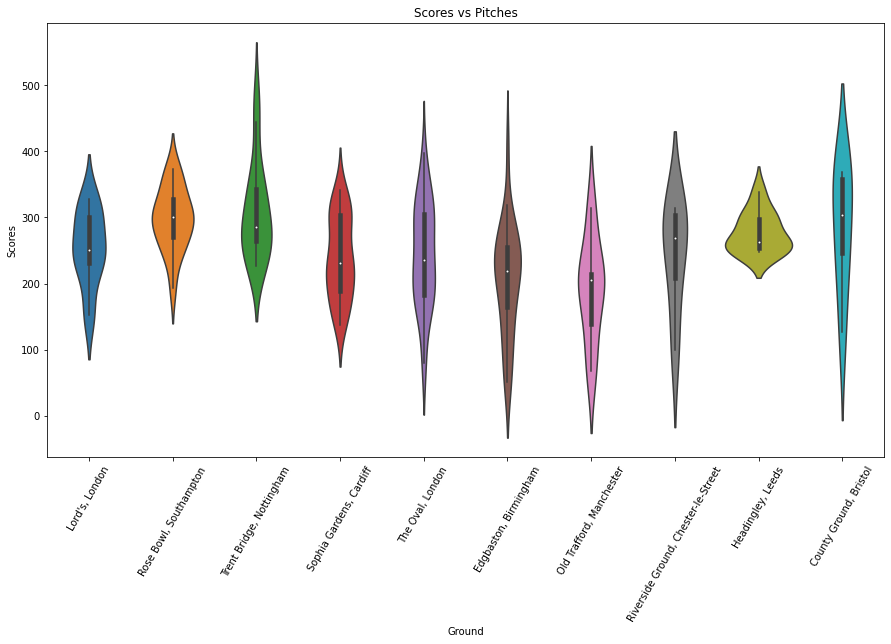

In [ ]:
WC_Grounds_History = WC_Grounds_History[~WC_Grounds_History.Score.str.contains("D")]
Scores = [int(item[0]) for item in WC_Grounds_History.Score.str.split("/")]
WC_Grounds_History["Score_without_wickets"] = Scores
Stadium_Scores = WC_Grounds_History[["Score_without_wickets","Ground"]]
Stadium_Scores = Stadium_Scores[Stadium_Scores.Score_without_wickets > 50]
plt.figure(figsize=(15,8))
#sns.barplot(x = "Country", y = "Count", hue = "Result", data = Ground_Results_Per_Team)
plt.xticks(rotation = 60)
sns.violinplot(x = "Ground", y = "Score_without_wickets",data = Stadium_Scores).set_title("Scores vs Pitches")
plt.ylabel("Scores")

As we can see,

1.   Trent Bridge, Nottingham, County Ground, Bristol and Headingley, Leeds are good scoring Pitches

Text(0, 0.5, 'Scores')

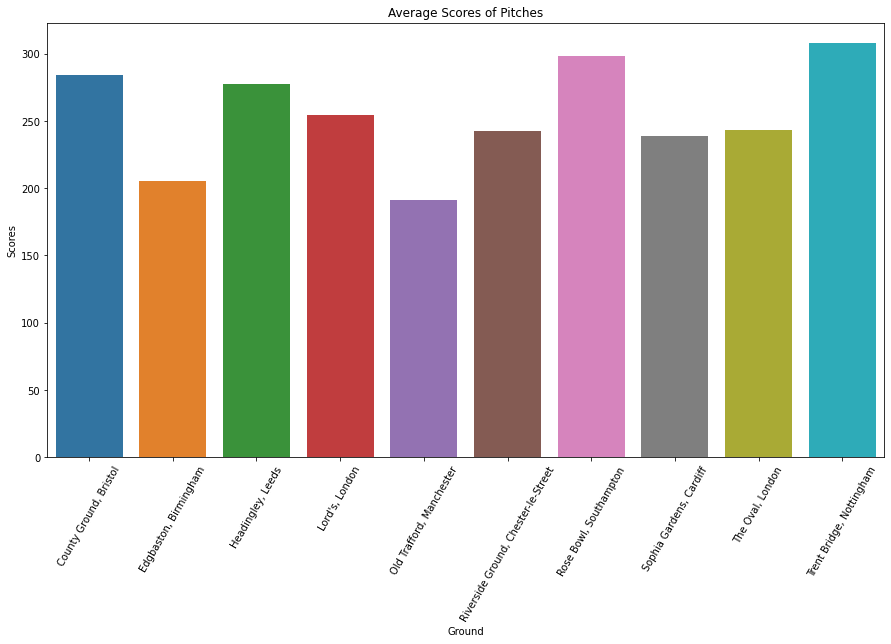

In [ ]:
Stadium_Scores = Stadium_Scores[Stadium_Scores.Score_without_wickets > 50]
Stadium_Scores = Stadium_Scores.groupby("Ground").mean().reset_index()
plt.figure(figsize=(15,8))
sns.barplot(x = "Ground", y = "Score_without_wickets", data = Stadium_Scores).set_title("Average Scores of Pitches")
plt.xticks(rotation = 60)
plt.ylabel("Scores")

So, We can understand that,

1. Trent Bridge, Nottingham, has an average score around 300. It shows that, Teams which play here can benifit much by scoring runs. If the team takes quick wickets and win by huge margin, then run rate will be more which can help in getting into semis.


### **Analyzing No.of Wickets in these Pitches**

In [ ]:
def no_of_wickets(value):
    if "/" not in value:
        return 10
    elif "D" in value:
        return 0
    else:
        return int(value.split("/")[1])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

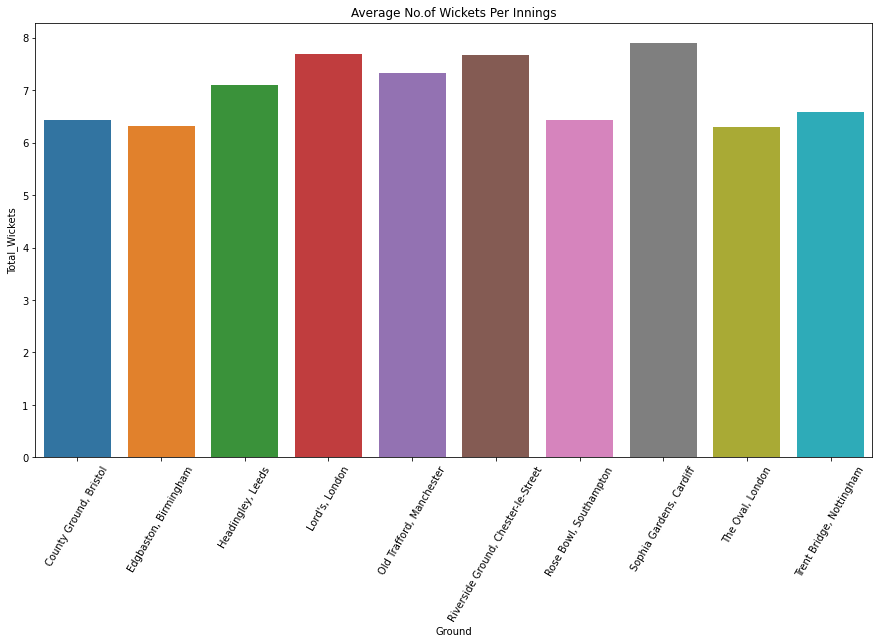

In [ ]:
WC_Grounds_History["Total_Wickets"] = WC_Grounds_History.Score.apply(no_of_wickets)

Stadium_Wickets = WC_Grounds_History[["Total_Wickets","Ground"]]
Stadium_Wickets = Stadium_Wickets.groupby("Ground").mean().reset_index()

plt.figure(figsize=(15,8))
sns.barplot(x = "Ground", y = "Total_Wickets", data = Stadium_Wickets).set_title("Average No.of Wickets Per Innings")
plt.xticks(rotation = 60)

As we clearly see that minimum no.of Wickets for any innings is usually 6-7

In [ ]:
Grounds = WC_Grounds_History.Ground.unique()
WC_Teams = WC_Grounds_History.Country.unique()
Ground_Winnings = {}
for Ground in Grounds:
    Ground_Winnings.update({Ground : {}})
    for Team in WC_Teams:
        Country_Ground_Record = WC_Grounds_History[(WC_Grounds_History.Country == Team) & \
                                                   (WC_Grounds_History.Ground == Ground)]
        #print("Ground : ", Ground, "Team : ", Team)
        matches_played = len(Country_Ground_Record)
        if matches_played == 0:
            continue
        matches_won = len(Country_Ground_Record[Country_Ground_Record.Result == "won"])
        winning_percentage = matches_won / matches_played * 100
        Ground_Winnings[Ground].update({Team : {"matches_played" : matches_played,\
                                       "matches_won": matches_won,\
                                       "winning_percentage" : winning_percentage}})
Ground_Winnings["Lord's, London"]

{'Australia': {'matches_played': 1,
  'matches_won': 1,
  'winning_percentage': 100.0},
 'England': {'matches_played': 7,
  'matches_won': 3,
  'winning_percentage': 42.857142857142854},
 'India': {'matches_played': 1, 'matches_won': 0, 'winning_percentage': 0.0},
 'Newzealad': {'matches_played': 1,
  'matches_won': 1,
  'winning_percentage': 100.0},
 'Pakistan': {'matches_played': 1,
  'matches_won': 0,
  'winning_percentage': 0.0},
 'SouthAfrica': {'matches_played': 1,
  'matches_won': 1,
  'winning_percentage': 100.0},
 'SriLanka': {'matches_played': 1,
  'matches_won': 1,
  'winning_percentage': 100.0}}

We have collected the Data according to Team wise wins in respective Stadiums. Lets plot to understand the Results

In [ ]:
Data_Frame_Data = []
for Pitch, P_Data in Ground_Winnings.items():
    
    for Team, Team_Data in P_Data.items():
        inside = []
        inside.extend([Pitch,Team,Team_Data["matches_played"],\
                       Team_Data["matches_won"],Team_Data["winning_percentage"]])
        Data_Frame_Data.append(inside)

In [ ]:
Columns = ["Ground", "Country","Played","Won","Win_Percentage"]
Data_Frame_Data
Pitch_Team_Winnings = pd.DataFrame(Data_Frame_Data, columns=Columns)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

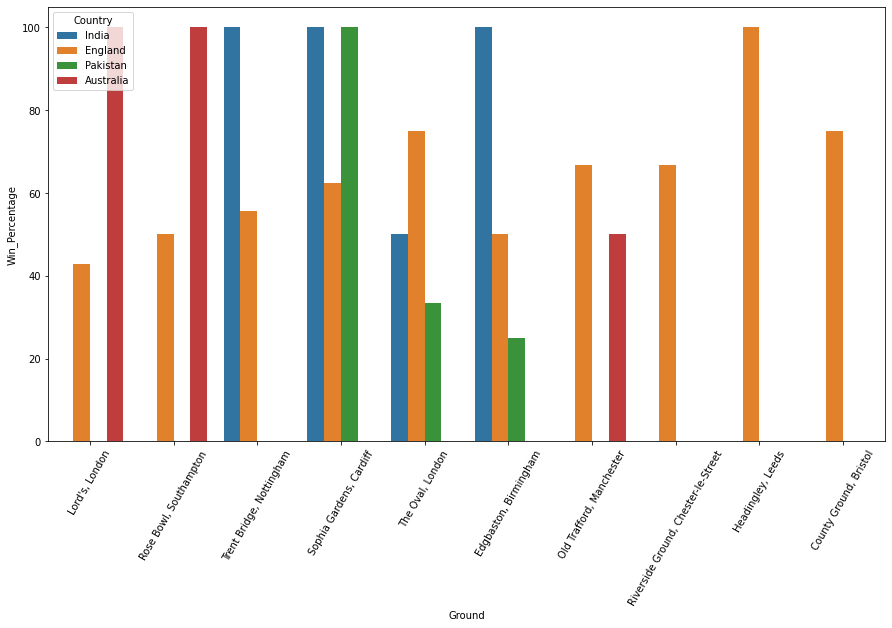

In [ ]:
Pitch_Team_Winnings
plt.figure(figsize=(15,8))
sns.barplot(x = "Ground", y = "Win_Percentage",hue = "Country", data = Pitch_Team_Winnings,\
            hue_order = ["India","England","Pakistan","Australia"])
plt.xticks(rotation = 60)

As we can see,


1.   Some Nations have Winning Percentage of 0 in few Stadiums (Either they might not play or never won)
2.   England, India has winning percentage of 100 in few Stadiums.



(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

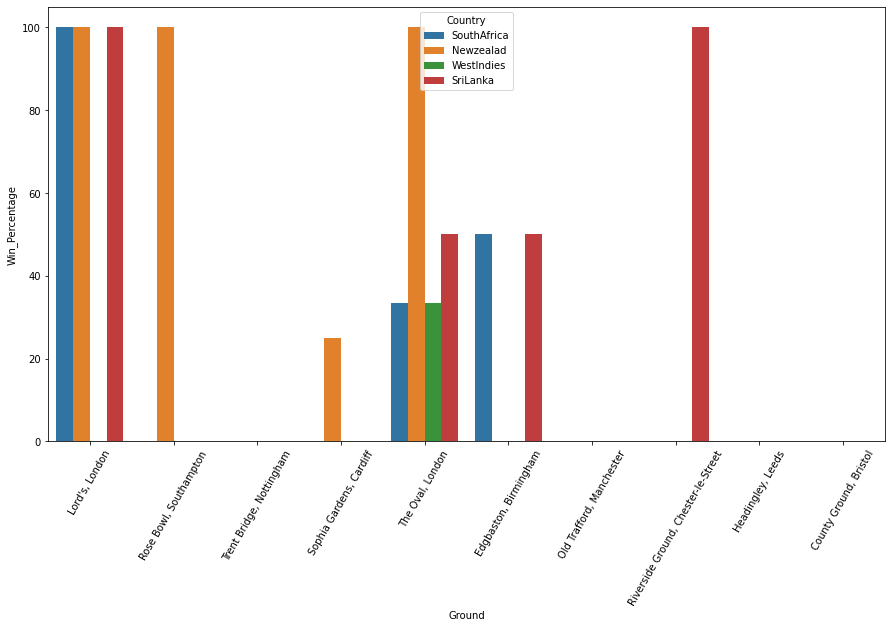

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x = "Ground", y = "Win_Percentage",hue = "Country", data = Pitch_Team_Winnings,\
            hue_order = ["SouthAfrica","Newzealad","WestIndies","SriLanka"])
plt.xticks(rotation = 60)

## **Analysis of Batsman**

In [ ]:
Batsman_Data.sample(5)

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
6409,6410,7,7,15,46.66,0,0,v South Africa,Chennai,22 Oct 2015,ODI # 3698,Shikhar Dhawan,28235
9941,9942,20,20,31,64.51,2,0,v England,Birmingham,10 Jun 2017,ODI # 3885,Glenn Maxwell,325026
6568,6569,20,20,40,50.00,2,0,v Zimbabwe,Harare,24 Jul 2013,ODI # 3395,Rohit Sharma,34102
2340,2341,DNB,-,-,-,-,-,v Pakistan,Centurion,25 Jan 2019,ODI # 4084,Dale Steyn,47492
2928,2929,40,40,57,70.17,5,0,v Pakistan,Abu Dhabi,6 Nov 2013,ODI # 3430,Quinton de Kock,379143


In [ ]:
#Removing DNB, and Fetching the Details of Batsmen stats only in England
Batsman_Data.drop(columns=Batsman_Data.columns[0],inplace=True)
Batsman_Data = Batsman_Data[~Batsman_Data.Bat1.isin(["DNB","TDNB"])]
Batsman_Data = Batsman_Data[Batsman_Data.Player_ID.isin(WC_Players_Data.ID)]
stadiums = [item[0] for item in set(WC_Ground_Stats)]
Batsman_Data_in_England = Batsman_Data[Batsman_Data.Ground.isin(stadiums)]

In [ ]:
#Calculating Averages
def Out_or_NotOut(value):
    if "*" in value:
        return 0
    else:
        return 1
Batsman_Data_in_England["Out_or_NotOut"] = Batsman_Data_in_England.Bat1.apply(Out_or_NotOut)

In [ ]:
change_type = ["Runs","BF","4s","6s"]
for i in change_type:
    Batsman_Data_in_England[i] = Batsman_Data_in_England[i].astype("int")
Batsman_Data_in_England.head()
Batsman_Data_Information = Batsman_Data_in_England
Batsman_Data_in_England = Batsman_Data_in_England.groupby(["Ground","Batsman"]).sum().reset_index()

In [ ]:
Batsman_Data_in_England["Average"] = Batsman_Data_in_England["Runs"]/Batsman_Data_in_England.Out_or_NotOut

In [ ]:
Batsman_Data_in_England.sort_values(by=["Average"],ascending=False).head(3)

,Ground,Batsman,Runs,BF,4s,6s,Player_ID,Out_or_NotOut,Average
369,Nottingham,Ravindra Jadeja,12,9,1,0,234675,0,inf
167,Chester-le-Street,Adil Rashid,12,9,2,0,244497,0,inf
389,Southampton,Chris Morris,35,22,3,2,439952,0,inf


In [ ]:
Batsman_Scores = Batsman_Data_in_England.groupby(["Batsman"]).sum().reset_index()
Batsman_Scores["Average"] = Batsman_Scores["Runs"]/Batsman_Scores["Out_or_NotOut"]
Batsman_Scores.sort_values(by = "Average",ascending=False).sample(5)

,Batsman,Runs,BF,4s,6s,Player_ID,Out_or_NotOut,Average
29,Glenn Maxwell,359,319,35,11,3250260,9,39.888889
66,Mashrafe Mortaza,101,112,15,1,504063,7,14.428571
61,MS Dhoni,665,799,57,9,561620,18,36.944444
89,Shai Hope,138,188,14,1,2325516,4,34.500000
59,Lasith Malinga,70,76,6,2,646854,8,8.750000


In [ ]:
Best_Batsman_Average = Batsman_Scores[(Batsman_Scores.Out_or_NotOut>0) & (Batsman_Scores.Average > 40 )]\
.sort_values(by = "Average",ascending = False)
Best_Batsman_Average

,Batsman,Runs,BF,4s,6s,Player_ID,Out_or_NotOut,Average
35,Imam-ul-Haq,234,263,24,1,2273104,2,117.000000
25,Evin Lewis,200,152,18,9,1295703,2,100.000000
39,Jason Holder,152,121,10,7,1174455,2,76.000000
81,Ravindra Jadeja,281,258,29,5,2346750,4,70.250000
86,Sarfaraz Ahmed,465,502,38,1,2277600,7,66.428571
46,Jonny Bairstow,1439,1295,166,23,9220423,22,65.409091
92,Shikhar Dhawan,976,966,118,13,479995,15,65.066667
52,Kane Williamson,815,849,84,7,3890684,13,62.692308
82,Rohit Sharma,687,829,72,13,511530,12,57.250000
33,Hashim Amla,851,941,94,5,746402,15,56.733333


In [ ]:
Player_WC_ID = Batsman_Data[["Player_ID","Batsman"]].drop_duplicates()

In [ ]:
#Best Batsman with Average above 40
Player_ID = list(Best_Batsman_Average.merge(Player_WC_ID,how = "left",on = "Batsman")["Player_ID_y"].astype("int"))
Best_Batsman_Average["Player_ID"] = Player_ID
WC_Players_Data.columns = ["Player", "Player_ID","Country"]
Country_Player = list(Best_Batsman_Average.merge(WC_Players_Data,how = "left",on = "Player_ID")["Country"])
Best_Batsman_Average["Country"] = Country_Player
Best_Batsman_Average

,Batsman,Runs,BF,4s,6s,Player_ID,Out_or_NotOut,Average,Country
35,Imam-ul-Haq,234,263,24,1,568276,2,117.000000,Pakistan
25,Evin Lewis,200,152,18,9,431901,2,100.000000,WestIndies
39,Jason Holder,152,121,10,7,391485,2,76.000000,WestIndies
81,Ravindra Jadeja,281,258,29,5,234675,4,70.250000,India
86,Sarfaraz Ahmed,465,502,38,1,227760,7,66.428571,Pakistan
46,Jonny Bairstow,1439,1295,166,23,297433,22,65.409091,England
92,Shikhar Dhawan,976,966,118,13,28235,15,65.066667,India
52,Kane Williamson,815,849,84,7,277906,13,62.692308,NewZealand
82,Rohit Sharma,687,829,72,13,34102,12,57.250000,India
33,Hashim Amla,851,941,94,5,43906,15,56.733333,SouthAfrica


In [ ]:
Best_Batsman_Average["Strike_Rate"] = Best_Batsman_Average["Runs"]/Best_Batsman_Average["BF"]*100
Best_Batsman_Average.head(5)

,Batsman,Runs,BF,4s,6s,Player_ID,Out_or_NotOut,Average,Country,Strike_Rate
35,Imam-ul-Haq,234,263,24,1,568276,2,117.000000,Pakistan,88.973384
25,Evin Lewis,200,152,18,9,431901,2,100.000000,WestIndies,131.578947
39,Jason Holder,152,121,10,7,391485,2,76.000000,WestIndies,125.619835
81,Ravindra Jadeja,281,258,29,5,234675,4,70.250000,India,108.914729
86,Sarfaraz Ahmed,465,502,38,1,227760,7,66.428571,Pakistan,92.629482


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text major ticklabel objects>)

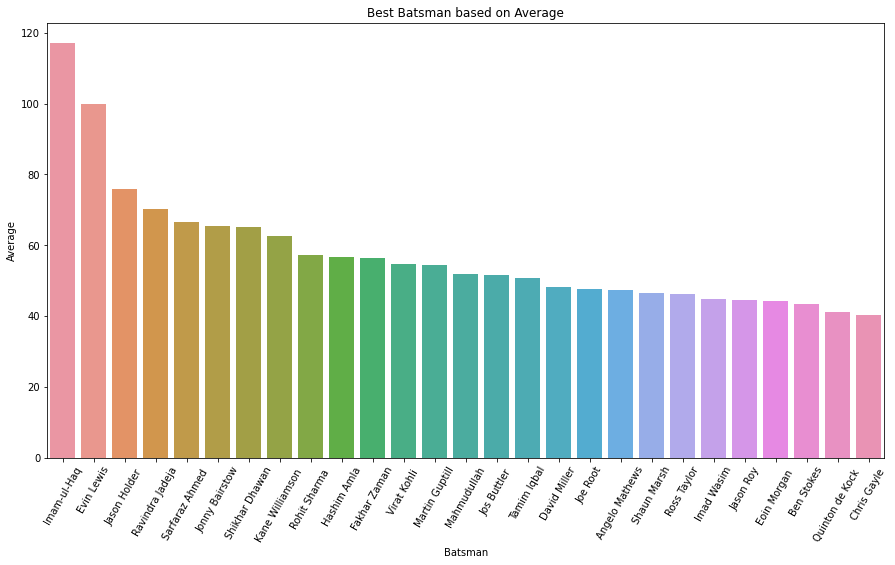

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x = "Batsman", y = "Average", data = Best_Batsman_Average).set_title("Best Batsman based on Average")
plt.xticks(rotation = 60)

Top 5 Batsman based on Average:


1.   Imam-ul-Haq
2.   Evin Lewis
3.   Jason Holder
4.   Ravindra Jadeja
5.   Sarfaraz Ahmed

Average is good for the above since they have played very few matches and performed well in those matches.

In [ ]:
Best_Batsman_Average.sort_values(["Strike_Rate"],ascending = False).head()

,Batsman,Runs,BF,4s,6s,Player_ID,Out_or_NotOut,Average,Country,Strike_Rate
25,Evin Lewis,200,152,18,9,431901,2,100.0000,WestIndies,131.578947
39,Jason Holder,152,121,10,7,391485,2,76.0000,WestIndies,125.619835
47,Jos Buttler,1654,1358,147,47,308967,32,51.6875,England,121.796760
28,Fakhar Zaman,452,394,50,11,512191,8,56.5000,Pakistan,114.720812
34,Imad Wasim,224,200,22,5,227758,5,44.8000,Pakistan,112.000000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text major ticklabel objects>)

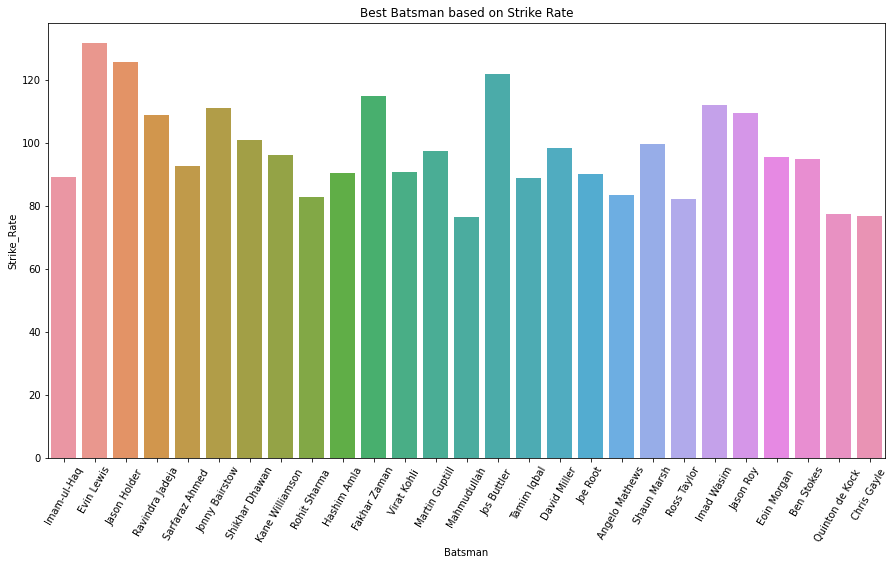

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x = "Batsman", y = "Strike_Rate", data = Best_Batsman_Average).set_title("Best Batsman based on Strike Rate")
plt.xticks(rotation = 60)

Top 5 Batsmen based on Strike Rate:

1.   Evin Lewis
2.   Jason Holder
3.   Jos Buttler
4.   Fakhar Zaman
5.   Imad Wasim

Jos Buttler & Jason Holder has good Strike Rate and Good Average.
So, above Players are the Best Players in the WC2019.

In [ ]:
Best_Batsman_Average["Average_4s_per_wicket"] = Best_Batsman_Average["4s"]/Best_Batsman_Average["Out_or_NotOut"]
Best_Batsman_Average["Average_6s_per_wicket"] = Best_Batsman_Average["6s"]/Best_Batsman_Average["Out_or_NotOut"]
Best_Batsman_Average.sort_values(by = ["Average_4s_per_wicket"],ascending=False).head()

,Batsman,Runs,BF,4s,6s,Player_ID,Out_or_NotOut,Average,Country,Strike_Rate,Average_4s_per_wicket,Average_6s_per_wicket
35,Imam-ul-Haq,234,263,24,1,568276,2,117.000000,Pakistan,88.973384,12.000000,0.500000
25,Evin Lewis,200,152,18,9,431901,2,100.000000,WestIndies,131.578947,9.000000,4.500000
92,Shikhar Dhawan,976,966,118,13,28235,15,65.066667,India,101.035197,7.866667,0.866667
46,Jonny Bairstow,1439,1295,166,23,297433,22,65.409091,England,111.119691,7.545455,1.045455
81,Ravindra Jadeja,281,258,29,5,234675,4,70.250000,India,108.914729,7.250000,1.250000


(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 7 Text major ticklabel objects>)

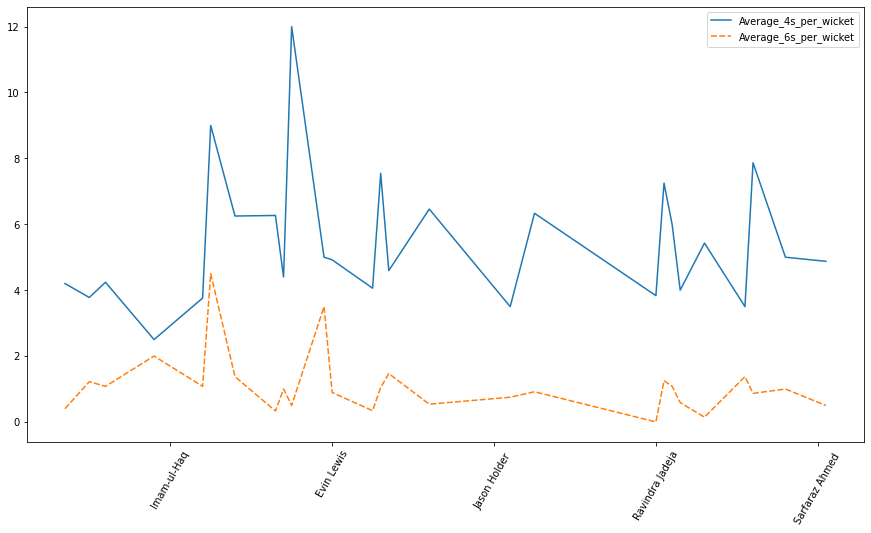

In [ ]:
plt.figure(figsize=(15,8))
g = sns.lineplot( data = Best_Batsman_Average[Best_Batsman_Average.columns[10:12]])
g.set_xticklabels(["Imam-ul-Haq"]+[item for item in Best_Batsman_Average.Batsman])
plt.xticks(rotation = 60)

Top 5 Batsmen with most 4s per innings:


1.   Imam-ul-Haq
2.   Evin Lewis
3.   Shikhar Dhawan
4.   Jonny Bairstow
5.   Ravindra Jadeja



In [ ]:
Best_Batsman_Average.sort_values(by = ["Average_6s_per_wicket"],ascending=False).head()

,Batsman,Runs,BF,4s,6s,Player_ID,Out_or_NotOut,Average,Country,Strike_Rate,Average_4s_per_wicket,Average_6s_per_wicket
25,Evin Lewis,200,152,18,9,431901,2,100.000000,WestIndies,131.578947,9.00000,4.50000
39,Jason Holder,152,121,10,7,391485,2,76.000000,WestIndies,125.619835,5.00000,3.50000
18,David Miller,289,294,15,12,321777,6,48.166667,SouthAfrica,98.299320,2.50000,2.00000
47,Jos Buttler,1654,1358,147,47,308967,32,51.687500,England,121.796760,4.59375,1.46875
91,Shaun Marsh,372,374,28,11,6683,8,46.500000,Australia,99.465241,3.50000,1.37500


Top 5 Batsmen with most 6s per innings:


1.   Evin Lewis
2.   Jason Holder
3.   David Miller
4.   Jos Buttler
5.   Shaun Marsh


---

### **Which Countries have highest number of Best Batsman ?**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

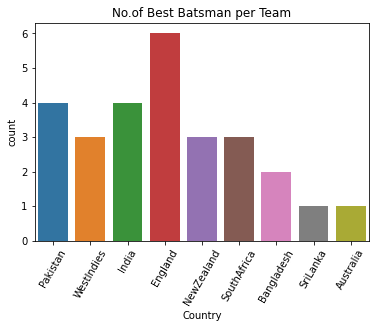

In [ ]:
sns.countplot(Best_Batsman_Average["Country"]).set_title("No.of Best Batsman per Team")
plt.xticks(rotation = 60)

Seems like there gonna be a tough fight among England, India, Pakistan.

Who are the Batsman?

In [ ]:
Best_Batsman_Average[["Country","Batsman"]].sort_values("Country")

,Country,Batsman
91,Australia,Shaun Marsh
62,Bangladesh,Mahmudullah
96,Bangladesh,Tamim Iqbal
47,England,Jos Buttler
46,England,Jonny Bairstow
45,England,Joe Root
24,England,Eoin Morgan
10,England,Ben Stokes
40,England,Jason Roy
92,India,Shikhar Dhawan


## **Analysis of Bowlers**

In [ ]:
Bowler_Data.head(5)

,Unnamed: 0,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Start Date,Match_ID,Bowler,Player_ID
0,1,8.0,0,57,0,7.12,-,-,v India,Nagpur,18 Dec 2009,ODI # 2933,Suranga Lakmal,49619
1,2,10.0,0,55,2,5.50,27.50,30.0,v India,Kolkata,24 Dec 2009,ODI # 2935,Suranga Lakmal,49619
2,3,-,-,-,-,-,-,-,v India,Delhi,27 Dec 2009,ODI # 2936,Suranga Lakmal,49619
3,4,9.0,1,63,2,7.00,31.50,27.0,v Bangladesh,Dhaka,4 Jan 2010,ODI # 2937,Suranga Lakmal,49619
4,5,8.0,1,48,0,6.00,-,-,v India,Dhaka,5 Jan 2010,ODI # 2938,Suranga Lakmal,49619


In [ ]:
Bowler_Data = Bowler_Data[Bowler_Data.Ground.isin(stadiums)]
Bowler_Data = Bowler_Data[~Bowler_Data.Overs.str.contains('-')]
Bowler_Data.sample(5)

,Unnamed: 0,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Start Date,Match_ID,Bowler,Player_ID
6726,6727,3.0,0,22,0,7.33,-,-,v England,Southampton,6 Sep 2011,ODI # 3187,Virat Kohli,253802
5053,5054,10.0,0,70,1,7.00,70.00,60.0,v England,Nottingham,17 Jun 2015,ODI # 3657,Tim Southee,232364
7133,7134,4.0,0,27,0,6.75,-,-,v India,Nottingham,12 Jul 2018,ODI # 4014,Ben Stokes,311158
3286,3287,10.0,0,80,1,8.00,80.00,60.0,v England,Southampton,11 May 2019,ODI # 4133,Shaheen Afridi,1072470
2502,2503,7.0,0,26,1,3.71,26.00,42.0,v Pakistan,Birmingham,10 Jun 2013,ODI # 3367,JP Duminy,44932


In the above data set,

*   Econ: Economy of Bowler means, how many runs does the Bowler concede in one Over.
*   Ave : Average for a Bowler means, how many runs conceded by Bowler per wicket.
*   SR : Strike Rate refers to no.of balls bowled for gaining the wicket.
*   Mdns : Maiden Over refers that the Bowler didn't concede any run.



In [ ]:
def overs_to_ball(value):
    if "." in value:
        over = value.split(".")
        return int(over[0]) * 6 + int(over[1])
    else:
        return int(value) * 6

In [ ]:
Bowler_Data["Balls"] = Bowler_Data.Overs.apply(overs_to_ball)
for i in ["Runs","Mdns","Wkts","Balls"]:
    Bowler_Data[i] = Bowler_Data[i].astype("float")
Bowler_Data.Ground = Bowler_Data.Ground.apply(Full_Ground_names)
Bowlers_Data_in_England = Bowler_Data.groupby(["Bowler"]).sum()[["Runs","Mdns","Wkts","Balls"]].reset_index()

In [ ]:
Bowlers_Data_in_England["Economy"] = Bowlers_Data_in_England.Runs * 6 /Bowlers_Data_in_England.Balls
Bowlers_Data_in_England["Average"] = Bowlers_Data_in_England.Runs/ Bowlers_Data_in_England.Wkts
Bowlers_Data_in_England["Strike_Rate"] = Bowlers_Data_in_England.Balls / Bowlers_Data_in_England.Wkts
Bowlers_Data_in_England.sample(5)

,Bowler,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate
49,Martin Guptill,12.0,0.0,0.0,6.0,12.000000,inf,inf
50,Mashrafe Mortaza,480.0,6.0,8.0,606.0,4.752475,60.000000,75.750000
27,JP Duminy,209.0,0.0,5.0,258.0,4.860465,41.800000,51.600000
16,Dhananjaya de Silva,3.0,0.0,0.0,6.0,3.000000,inf,inf
44,Liam Plunkett,2033.0,3.0,68.0,2071.0,5.889908,29.897059,30.455882


Since we are concentrating mainly on Best Bowlers and Full time Bowlers, Let's remove the Bowlers Data Who have bowled a total of less than 10 overs in England Pitches and taken at least one wicket.

In [ ]:
Bowlers_Data_in_England = Bowlers_Data_in_England[(Bowlers_Data_in_England.Balls > 36) & (Bowlers_Data_in_England.Wkts > 0)]
Bowlers_Data_in_England

,Bowler,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate
1,Adam Zampa,65.0,1.0,2.0,74.0,5.270270,32.500000,37.000000
2,Adil Rashid,2219.0,3.0,72.0,2382.0,5.589421,30.819444,33.083333
3,Andile Phehlukwayo,158.0,1.0,3.0,144.0,6.583333,52.666667,48.000000
5,Angelo Mathews,232.0,1.0,8.0,306.0,4.549020,29.000000,38.250000
6,Ashley Nurse,202.0,0.0,1.0,167.0,7.257485,202.000000,167.000000
...,...,...,...,...,...,...,...,...
76,Tim Southee,704.0,10.0,25.0,761.0,5.550591,28.160000,30.440000
77,Tom Curran,211.0,1.0,7.0,180.0,7.033333,30.142857,25.714286
78,Trent Boult,240.0,1.0,9.0,264.0,5.454545,26.666667,29.333333
79,Virat Kohli,120.0,0.0,1.0,108.0,6.666667,120.000000,108.000000


In [ ]:
Player_WC_ID = Bowler_Data[["Player_ID","Bowler"]].drop_duplicates()

Bowlers_Data_in_England = Bowlers_Data_in_England.merge(Player_WC_ID,how = "left",on = "Bowler")

Country_Player = list(Bowlers_Data_in_England.merge(WC_Players_Data,how = "left",on = "Player_ID")["Country"])
Bowlers_Data_in_England["Country"] = Country_Player
Bowlers_Data_in_England.iloc[57,-1] = "SriLanka"
Bowlers_Data_in_England

,Bowler,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate,Player_ID,Country
0,Adam Zampa,65.0,1.0,2.0,74.0,5.270270,32.500000,37.000000,379504,Australia
1,Adil Rashid,2219.0,3.0,72.0,2382.0,5.589421,30.819444,33.083333,244497,England
2,Andile Phehlukwayo,158.0,1.0,3.0,144.0,6.583333,52.666667,48.000000,540316,SouthAfrica
3,Angelo Mathews,232.0,1.0,8.0,306.0,4.549020,29.000000,38.250000,49764,SriLanka
4,Ashley Nurse,202.0,0.0,1.0,167.0,7.257485,202.000000,167.000000,315594,WestIndies
...,...,...,...,...,...,...,...,...,...,...
59,Tim Southee,704.0,10.0,25.0,761.0,5.550591,28.160000,30.440000,232364,NewZealand
60,Tom Curran,211.0,1.0,7.0,180.0,7.033333,30.142857,25.714286,550235,England
61,Trent Boult,240.0,1.0,9.0,264.0,5.454545,26.666667,29.333333,277912,NewZealand
62,Virat Kohli,120.0,0.0,1.0,108.0,6.666667,120.000000,108.000000,253802,India


### **Highest Number of Maiden Overs**

In [ ]:
Bowlers_Data_in_England.sort_values(by = ["Mdns"], ascending=False)[:10]

,Bowler,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate,Player_ID,Country
32,Lasith Malinga,1039.0,12.0,36.0,1126.0,5.536412,28.861111,31.277778,49758,SriLanka
9,Chris Woakes,1185.0,12.0,33.0,1257.0,5.656325,35.909091,38.090909,247235,England
6,Bhuvneshwar Kumar,517.0,11.0,18.0,693.0,4.476190,28.722222,38.500000,326016,India
35,Mark Wood,1234.0,10.0,28.0,1351.0,5.480385,44.071429,48.250000,351588,England
59,Tim Southee,704.0,10.0,25.0,761.0,5.550591,28.160000,30.440000,232364,NewZealand
11,David Willey,1221.0,8.0,39.0,1221.0,6.000000,31.307692,31.307692,308251,England
36,Mashrafe Mortaza,480.0,6.0,8.0,606.0,4.752475,60.000000,75.750000,56007,Bangladesh
40,Moeen Ali,1451.0,5.0,32.0,1607.0,5.417548,45.343750,50.218750,8917,England
50,Ravindra Jadeja,729.0,5.0,27.0,852.0,5.133803,27.000000,31.555556,234675,India
26,Kagiso Rabada,268.0,5.0,8.0,312.0,5.153846,33.500000,39.000000,550215,SouthAfrica


Here, If we observe Bhuvneshwar Kumar, His maiden Overs are less, but he bowled few overs compared to others. So we should consider no.of maidens per total Overs. Then, it's correct way to judge.

In [ ]:
Bowlers_Data_in_England["Maidens_per_Overs_Percentage"] = \
((Bowlers_Data_in_England.Mdns*6)/(Bowlers_Data_in_England.Balls))*100
Bowlers_Data_in_England.sample(5)

,Bowler,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate,Player_ID,Country,Maidens_per_Overs_Percentage
23,Jhye Richardson,214.0,1.0,5.0,162.0,7.925926,42.800000,32.400000,774223,Australia,3.703704
34,Marcus Stoinis,240.0,0.0,3.0,219.0,6.575342,80.000000,73.000000,325012,Australia,0.000000
56,Steve Smith,191.0,0.0,7.0,228.0,5.026316,27.285714,32.571429,267192,Australia,0.000000
41,Mohammad Hafeez,540.0,1.0,10.0,711.0,4.556962,54.000000,71.100000,41434,Pakistan,0.843882
25,Junaid Khan,399.0,4.0,11.0,429.0,5.580420,36.272727,39.000000,259551,Pakistan,5.594406


In [ ]:
Bowlers_Data_in_England.sort_values(by = ["Maidens_per_Overs_Percentage"], ascending=False)[:10]

,Bowler,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate,Player_ID,Country,Maidens_per_Overs_Percentage
30,Kemar Roach,75.0,4.0,3.0,96.0,4.687500,25.000000,32.000000,230553,WestIndies,25.000000
26,Kagiso Rabada,268.0,5.0,8.0,312.0,5.153846,33.500000,39.000000,550215,SouthAfrica,9.615385
6,Bhuvneshwar Kumar,517.0,11.0,18.0,693.0,4.476190,28.722222,38.500000,326016,India,9.523810
0,Adam Zampa,65.0,1.0,2.0,74.0,5.270270,32.500000,37.000000,379504,Australia,8.108108
59,Tim Southee,704.0,10.0,25.0,761.0,5.550591,28.160000,30.440000,232364,NewZealand,7.884363
46,Nathan Coulter-Nile,123.0,2.0,4.0,156.0,4.730769,30.750000,39.000000,261354,Australia,7.692308
32,Lasith Malinga,1039.0,12.0,36.0,1126.0,5.536412,28.861111,31.277778,49758,SriLanka,6.394316
36,Mashrafe Mortaza,480.0,6.0,8.0,606.0,4.752475,60.000000,75.750000,56007,Bangladesh,5.940594
9,Chris Woakes,1185.0,12.0,33.0,1257.0,5.656325,35.909091,38.090909,247235,England,5.727924
25,Junaid Khan,399.0,4.0,11.0,429.0,5.580420,36.272727,39.000000,259551,Pakistan,5.594406


### **Top 10 Best Bowlers based on Average**

In [ ]:
Top_ten_avg = Bowlers_Data_in_England.sort_values(by = ["Average"])[:10]
Top_ten_avg

,Bowler,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate,Player_ID,Country
31,Kuldeep Yadav,148.0,0.0,9.0,180.0,4.933333,16.444444,20.000000,559235,India
43,Mohammed Shami,152.0,1.0,8.0,195.0,4.676923,19.000000,24.375000,481896,India
29,Kedar Jadhav,67.0,0.0,3.0,72.0,5.583333,22.333333,24.000000,290716,India
44,Mosaddek Hossain,73.0,0.0,3.0,74.0,5.918919,24.333333,24.666667,550133,Bangladesh
30,Kemar Roach,75.0,4.0,3.0,96.0,4.687500,25.000000,32.000000,230553,WestIndies
27,Kane Richardson,156.0,1.0,6.0,156.0,6.000000,26.000000,26.000000,272262,Australia
61,Trent Boult,240.0,1.0,9.0,264.0,5.454545,26.666667,29.333333,277912,NewZealand
50,Ravindra Jadeja,729.0,5.0,27.0,852.0,5.133803,27.000000,31.555556,234675,India
16,Hasan Ali,623.0,3.0,23.0,666.0,5.612613,27.086957,28.956522,681305,Pakistan
56,Steve Smith,191.0,0.0,7.0,228.0,5.026316,27.285714,32.571429,267192,Australia


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

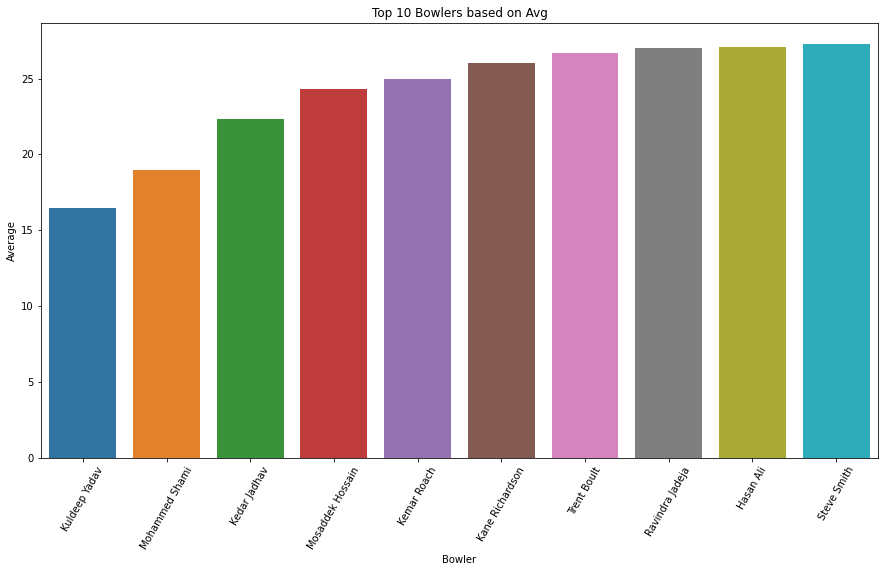

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x = "Bowler", y = "Average", data = Top_ten_avg).set_title("Top 10 Bowlers based on Avg")
plt.xticks(rotation = 60)

### **Top 10 Best Bowlers based on Economy**

In [ ]:
Top_ten_eco = Bowlers_Data_in_England.sort_values(by = ["Economy"])[:10]
Top_ten_eco

,Bowler,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate,Player_ID,Country
47,Nathan Lyon,70.0,0.0,1.0,102.0,4.117647,70.000000,102.000000,272279,Australia
55,Shoaib Malik,376.0,3.0,11.0,504.0,4.476190,34.181818,45.818182,42657,Pakistan
6,Bhuvneshwar Kumar,517.0,11.0,18.0,693.0,4.476190,28.722222,38.500000,326016,India
63,Yuzvendra Chahal,135.0,0.0,2.0,180.0,4.500000,67.500000,90.000000,430246,India
3,Angelo Mathews,232.0,1.0,8.0,306.0,4.549020,29.000000,38.250000,49764,SriLanka
41,Mohammad Hafeez,540.0,1.0,10.0,711.0,4.556962,54.000000,71.100000,41434,Pakistan
43,Mohammed Shami,152.0,1.0,8.0,195.0,4.676923,19.000000,24.375000,481896,India
30,Kemar Roach,75.0,4.0,3.0,96.0,4.687500,25.000000,32.000000,230553,WestIndies
7,Chris Gayle,446.0,2.0,15.0,566.0,4.727915,29.733333,37.733333,51880,WestIndies
46,Nathan Coulter-Nile,123.0,2.0,4.0,156.0,4.730769,30.750000,39.000000,261354,Australia


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

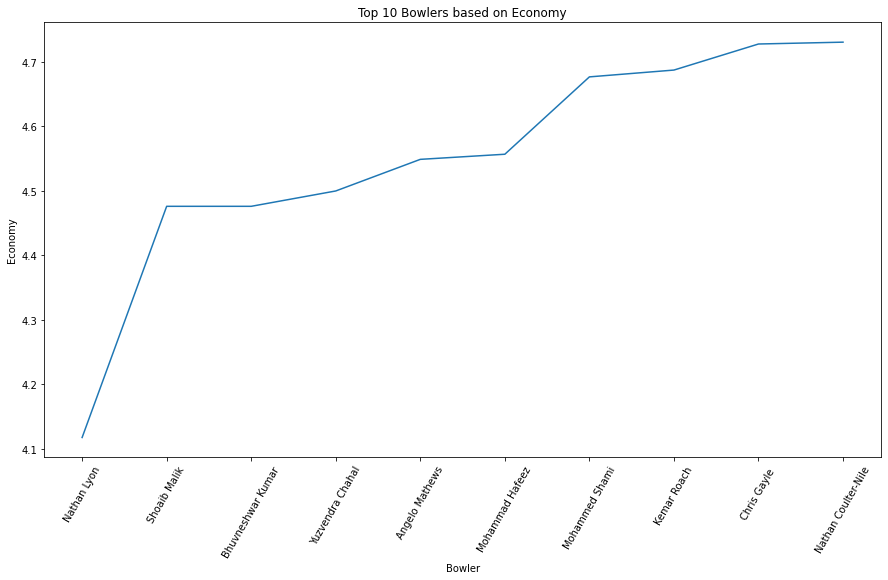

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(x = "Bowler", y = "Economy", data = Top_ten_eco).set_title("Top 10 Bowlers based on Economy")
plt.xticks(rotation = 60)

### **Top 10 Best Bowlers based on Strike Rate**

In [ ]:
Top_ten_str = Bowlers_Data_in_England.sort_values(by = ["Strike_Rate"])[:10]
Top_ten_str

,Bowler,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate,Player_ID,Country
31,Kuldeep Yadav,148.0,0.0,9.0,180.0,4.933333,16.444444,20.000000,559235,India
29,Kedar Jadhav,67.0,0.0,3.0,72.0,5.583333,22.333333,24.000000,290716,India
43,Mohammed Shami,152.0,1.0,8.0,195.0,4.676923,19.000000,24.375000,481896,India
44,Mosaddek Hossain,73.0,0.0,3.0,74.0,5.918919,24.333333,24.666667,550133,Bangladesh
60,Tom Curran,211.0,1.0,7.0,180.0,7.033333,30.142857,25.714286,550235,England
27,Kane Richardson,156.0,1.0,6.0,156.0,6.000000,26.000000,26.000000,272262,Australia
16,Hasan Ali,623.0,3.0,23.0,666.0,5.612613,27.086957,28.956522,681305,Pakistan
22,Jeevan Mendis,170.0,0.0,6.0,174.0,5.862069,28.333333,29.000000,49700,SriLanka
61,Trent Boult,240.0,1.0,9.0,264.0,5.454545,26.666667,29.333333,277912,NewZealand
42,Mohammad Hasnain,80.0,0.0,2.0,60.0,8.000000,40.000000,30.000000,1158100,Pakistan


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

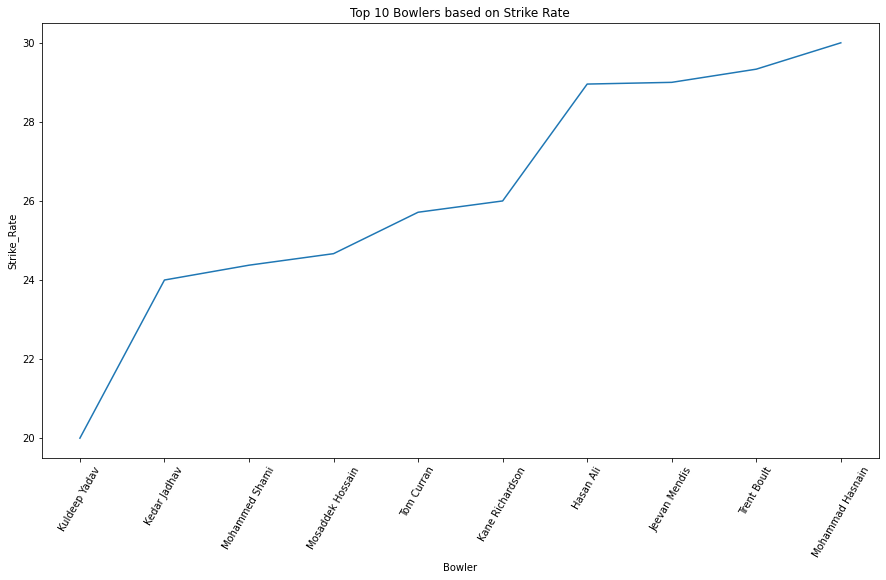

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(x = "Bowler", y = "Strike_Rate", data = Top_ten_str).set_title("Top 10 Bowlers based on Strike Rate")
plt.xticks(rotation = 60)

### **Top 10 Highest Wicket Takers**

In [ ]:
Bowlers_Data_in_England.sort_values(by = ["Wkts"],ascending=False)[:10]

,Bowler,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate,Player_ID,Country,Maidens_per_Overs_Percentage
1,Adil Rashid,2219.0,3.0,72.0,2382.0,5.589421,30.819444,33.083333,244497,England,0.755668
33,Liam Plunkett,2033.0,3.0,68.0,2071.0,5.889908,29.897059,30.455882,19264,England,0.869145
11,David Willey,1221.0,8.0,39.0,1221.0,6.000000,31.307692,31.307692,308251,England,3.931204
32,Lasith Malinga,1039.0,12.0,36.0,1126.0,5.536412,28.861111,31.277778,49758,SriLanka,6.394316
9,Chris Woakes,1185.0,12.0,33.0,1257.0,5.656325,35.909091,38.090909,247235,England,5.727924
40,Moeen Ali,1451.0,5.0,32.0,1607.0,5.417548,45.343750,50.218750,8917,England,1.866833
5,Ben Stokes,1224.0,1.0,30.0,1189.0,6.176619,40.800000,39.633333,311158,England,0.504626
35,Mark Wood,1234.0,10.0,28.0,1351.0,5.480385,44.071429,48.250000,351588,England,4.441155
50,Ravindra Jadeja,729.0,5.0,27.0,852.0,5.133803,27.000000,31.555556,234675,India,3.521127
59,Tim Southee,704.0,10.0,25.0,761.0,5.550591,28.160000,30.440000,232364,NewZealand,7.884363


It's obvious that, England played many matches, so that's why, they are leading in taking Wickets.

---

### **Which Countries have Best Bowlers ?**


In [ ]:
aggregations = {
    'Runs':'sum',
    'Mdns':'sum',
    'Wkts':'sum',
    'Balls':'sum',
    'Economy': 'mean',
    'Average':'mean',
    'Strike_Rate':'mean',
    'Maidens_per_Overs_Percentage':'mean'
}
Bowlers_Data_in_England_TeamWise = Bowlers_Data_in_England.groupby('Country').agg(aggregations).reset_index()
Bowlers_Data_in_England_TeamWise

,Country,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate,Maidens_per_Overs_Percentage
0,Australia,2175.0,12.0,60.0,2300.0,5.631351,42.014177,46.166234,3.249520
1,Bangladesh,1358.0,6.0,22.0,1484.0,5.778804,79.500000,81.583333,1.188119
2,England,11467.0,43.0,318.0,11942.0,5.920822,40.538542,41.417132,2.381099
3,India,2467.0,19.0,77.0,2901.0,5.255050,47.922222,52.581173,2.236536
4,NewZealand,1782.0,11.0,53.0,1769.0,6.263260,37.813667,35.754667,2.031418
5,Pakistan,2999.0,12.0,74.0,3366.0,6.028354,56.615722,54.646572,1.536407
6,SouthAfrica,1511.0,12.0,40.0,1681.0,5.552081,41.977381,45.035714,3.355573
7,SriLanka,2592.0,14.0,78.0,2721.0,5.701535,39.753114,42.422306,1.564634
8,WestIndies,885.0,6.0,21.0,969.0,5.903939,84.433333,76.683333,6.780035


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

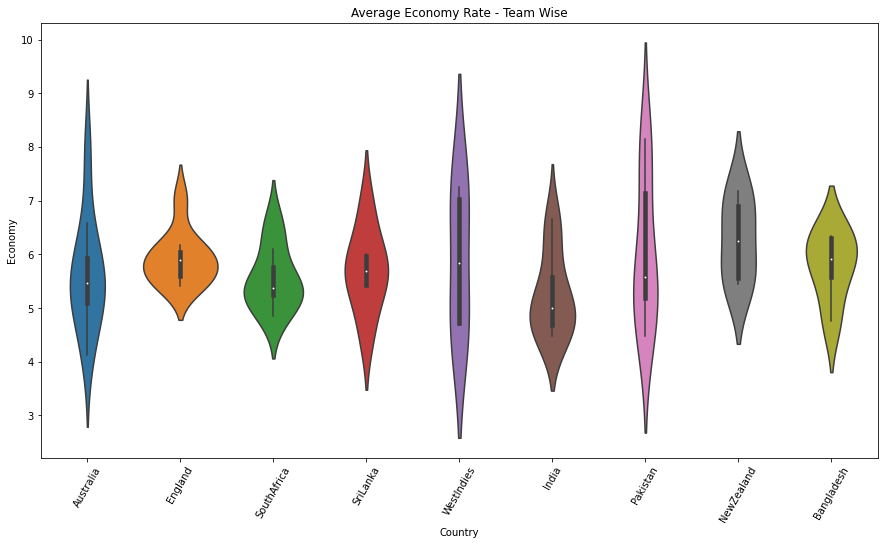

In [ ]:
plt.figure(figsize=(15,8))
sns.violinplot(x = "Country", y = "Economy", data = Bowlers_Data_in_England).set_title("Average Economy Rate - Team Wise")
plt.xticks(rotation = 60)

As you can conclude from the above graph:

1.   Batsmen can target High Economy Rate Teams like, Bangladesh, New Zealand, West Indies.
2.   India, South Africa, Australia have good Economy Rates.



(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

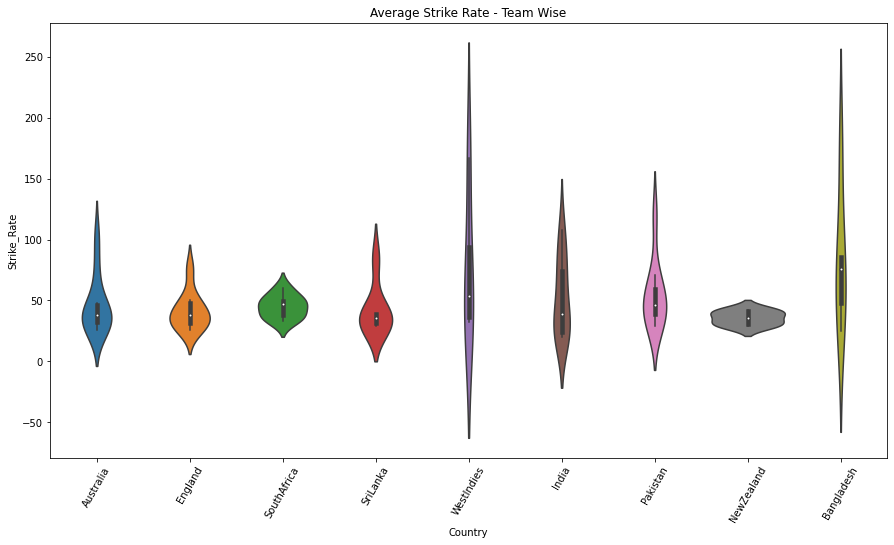

In [ ]:
plt.figure(figsize=(15,8))
sns.violinplot(x = "Country", y = "Strike_Rate", data = Bowlers_Data_in_England).set_title("Average Strike Rate - Team Wise")
plt.xticks(rotation = 60)


*   On an Average, it seems like all Nations take around 40-60 Balls for taking a Wicket.
*   New Zealand has good consistency Strike Rate. But in previous graph we can observe that, they are giving more runs. That point should be noted.



(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

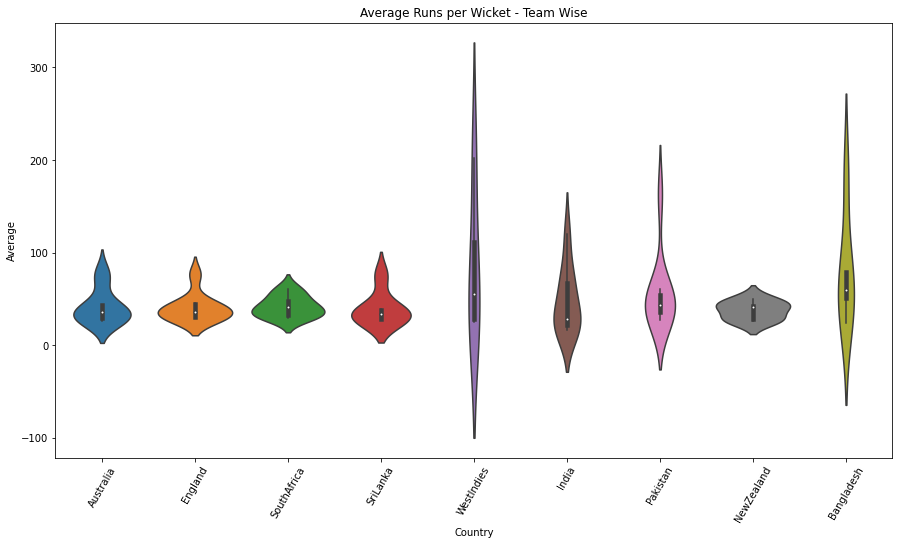

In [ ]:
plt.figure(figsize=(15,8))
sns.violinplot(x = "Country", y = "Average", data = Bowlers_Data_in_England).set_title("Average Runs per Wicket - Team Wise")
plt.xticks(rotation = 60)

We can observe that:


1.   Teams are targeting Bangladesh.
2.   No consistency in West Indies, India, Pakistan.
3.   Even New Zealand is giving more runs per wicket.
4.   Australia, England, South Africa are consistent in giving runs per wicket.
5.   On an Average, India has less Average Rate.



In [ ]:
Bowlers_Data_in_England_TeamWise

,Country,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate,Maidens_per_Overs_Percentage
0,Australia,2175.0,12.0,60.0,2300.0,5.631351,42.014177,46.166234,3.249520
1,Bangladesh,1358.0,6.0,22.0,1484.0,5.778804,79.500000,81.583333,1.188119
2,England,11467.0,43.0,318.0,11942.0,5.920822,40.538542,41.417132,2.381099
3,India,2467.0,19.0,77.0,2901.0,5.255050,47.922222,52.581173,2.236536
4,NewZealand,1782.0,11.0,53.0,1769.0,6.263260,37.813667,35.754667,2.031418
5,Pakistan,2999.0,12.0,74.0,3366.0,6.028354,56.615722,54.646572,1.536407
6,SouthAfrica,1511.0,12.0,40.0,1681.0,5.552081,41.977381,45.035714,3.355573
7,SriLanka,2592.0,14.0,78.0,2721.0,5.701535,39.753114,42.422306,1.564634
8,WestIndies,885.0,6.0,21.0,969.0,5.903939,84.433333,76.683333,6.780035


(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.]),
 <a list of 11 Text major ticklabel objects>)

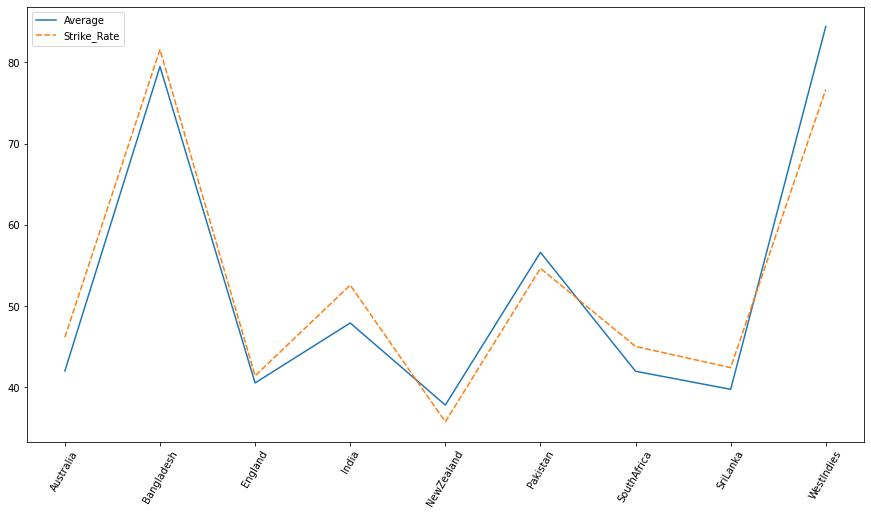

In [ ]:
plt.figure(figsize=(15,8))
g = sns.lineplot( data = Bowlers_Data_in_England_TeamWise[Bowlers_Data_in_England_TeamWise.columns[6:8]])
g.set_xticklabels(["Australia"]+[item for item in Bowlers_Data_in_England_TeamWise.Country])
plt.xticks(rotation = 60)

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.]),
 <a list of 11 Text major ticklabel objects>)

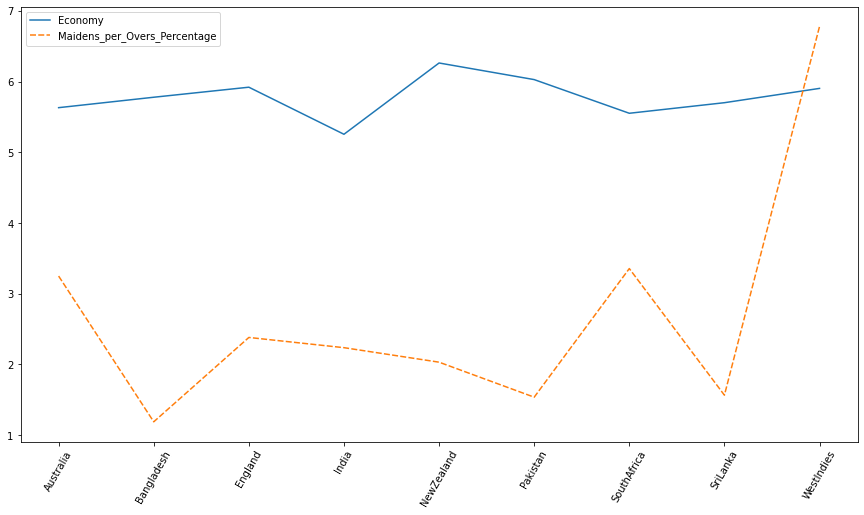

In [ ]:
plt.figure(figsize=(15,8))
g = sns.lineplot( data = Bowlers_Data_in_England_TeamWise[["Economy","Maidens_per_Overs_Percentage"]])
g.set_xticklabels(["Australia"]+[item for item in Bowlers_Data_in_England_TeamWise.Country])
plt.xticks(rotation = 60)

Insights

1.   When Playing against India, it's difficult to score high runs, even thoug India may not take wickets but they will restrict opponents to a less score.
2.   South Africa seems to be the Best Team in terms of Bowling.
3.   Teams can score more while playing against Bangladesh and West Indies.


---


So now, let's see Which Country has Best Bowlers in their Team. Best Bowlers : Qualifying Criteria,

1.   Minimum no.of Overs Bowled : 25
2.   Average Less than 40
3.   Strike Rate Less than 40
4.   Economy Rate Less than 7.5



In [ ]:
Best_Bowlers_Data = Bowlers_Data_in_England[(Bowlers_Data_in_England.Balls > 150) &\
                        (Bowlers_Data_in_England.Average < 40) &\
                        (Bowlers_Data_in_England.Strike_Rate < 40)&\
                        (Bowlers_Data_in_England.Economy < 7.5)
                        
                       ]
Best_Bowlers_Data

,Bowler,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate,Player_ID,Country,Maidens_per_Overs_Percentage
1,Adil Rashid,2219.0,3.0,72.0,2382.0,5.589421,30.819444,33.083333,244497,England,0.755668
3,Angelo Mathews,232.0,1.0,8.0,306.0,4.549020,29.000000,38.250000,49764,SriLanka,1.960784
6,Bhuvneshwar Kumar,517.0,11.0,18.0,693.0,4.476190,28.722222,38.500000,326016,India,9.523810
7,Chris Gayle,446.0,2.0,15.0,566.0,4.727915,29.733333,37.733333,51880,WestIndies,2.120141
9,Chris Woakes,1185.0,12.0,33.0,1257.0,5.656325,35.909091,38.090909,247235,England,5.727924
10,Dale Steyn,324.0,3.0,10.0,364.0,5.340659,32.400000,36.400000,47492,SouthAfrica,4.945055
11,David Willey,1221.0,8.0,39.0,1221.0,6.000000,31.307692,31.307692,308251,England,3.931204
16,Hasan Ali,623.0,3.0,23.0,666.0,5.612613,27.086957,28.956522,681305,Pakistan,2.702703
18,Imran Tahir,148.0,0.0,5.0,165.0,5.381818,29.600000,33.000000,40618,SouthAfrica,0.000000
22,Jeevan Mendis,170.0,0.0,6.0,174.0,5.862069,28.333333,29.000000,49700,SriLanka,0.000000


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

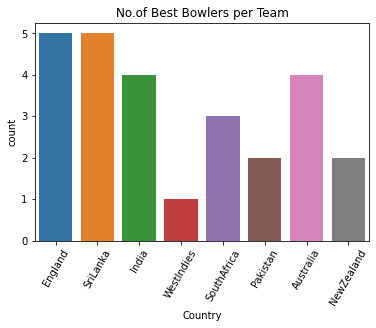

In [ ]:
sns.countplot(Bowlers_Data_in_England[(Bowlers_Data_in_England.Balls > 150) &\
                        (Bowlers_Data_in_England.Average < 40) &\
                        (Bowlers_Data_in_England.Strike_Rate < 40)&\
                        (Bowlers_Data_in_England.Economy < 7.5)].Country).\
set_title("No.of Best Bowlers per Team")
plt.xticks(rotation = 60)



*   England seems to be best in both, Batting and Bowling Department.
*   India seems to be tough Oppostion for England.



## **Analyis of Best All Rounders**

In [ ]:
Bowler_Data = Bowler_Data[Bowler_Data.columns[1:]]
Bowler_Data.columns = ['Overs', 'Maidens', 'Runs_Given', 'Wickets', 'Economy', 'Bowling_Average', 'Bowling_StrikeRate', 'Opposition',\
                       'Ground', 'Start_Date', 'Match_ID', 'Player', 'Player_ID', 'Balls_Bowled']
Bowler_Data.sample(5)

,Overs,Maidens,Runs_Given,Wickets,Economy,Bowling_Average,Bowling_StrikeRate,Opposition,Ground,Start_Date,Match_ID,Player,Player_ID,Balls_Bowled
7097,2.0,0.0,6.0,0.0,3.00,-,-,v Australia,"Old Trafford, Manchester",8 Sep 2015,ODI # 3682,Ben Stokes,311158,12.0
7454,7.0,0.0,32.0,1.0,4.57,32.00,42.0,v Sri Lanka,"Lord's, London",17 Jun 2006,ODI # 2384,Liam Plunkett,19264,42.0
1272,3.0,0.0,28.0,1.0,9.33,28.00,18.0,v India,"Sophia Gardens, Cardiff",20 Jun 2013,ODI # 3376,Jeevan Mendis,49700,18.0
3401,10.0,0.0,63.0,0.0,6.30,-,-,v England,"Rose Bowl, Southampton",11 May 2019,ODI # 4133,Imad Wasim,227758,60.0
7135,6.0,0.0,43.0,0.0,7.16,-,-,v India,"Headingley, Leeds",17 Jul 2018,ODI # 4018,Ben Stokes,311158,36.0


In [ ]:
Batsman_Data_Information.sample(5)
Batsman_Data_Information.Ground = Batsman_Data_Information.Ground.apply(Full_Ground_names)
Batsman_Data_Information = Batsman_Data_Information[["Runs","BF","SR","4s","6s","Match_ID",\
                                                     "Player_ID","Out_or_NotOut"]]
Batsman_Data_Information.columns = ["Runs_Scored","Balls_Faced","Batting_StrikeRate","4s","6s",\
                                    "Match_ID","Player_ID","Out_or_NotOut"]
                                    
Batsman_Data_Information.sample(5)

,Runs_Scored,Balls_Faced,Batting_StrikeRate,4s,6s,Match_ID,Player_ID,Out_or_NotOut
3387,25,21,119.04,1,1,ODI # 3894,227758,0
10282,20,19,105.26,0,2,ODI # 4011,5334,1
803,53,51,103.92,3,5,ODI # 3278,51880,1
7835,49,40,122.50,5,2,ODI # 3525,308967,1
1906,67,54,124.07,6,1,ODI # 3757,49764,0


In [ ]:
All_Rounders_Data = Bowler_Data.merge(Batsman_Data_Information,on = ["Match_ID","Player_ID"])
# All_Rounders_Data[["Player","Player_ID","Match_ID","Start_Date","Ground","Opposition","Runs_Scored","Balls_Faced",\
#                   "Batting_StrikeRate","4s","6s","Out_or_NotOut","Overs","Maidens","Runs_Given","Wickets","Economy",\
#                   "Bowling_Average","Bowling_StrikeRate"]]
All_Rounders_Data.sample(5)

,Overs,Maidens,Runs_Given,Wickets,Economy,Bowling_Average,Bowling_StrikeRate,Opposition,Ground,Start_Date,Match_ID,Player,Player_ID,Balls_Bowled,Runs_Scored,Balls_Faced,Batting_StrikeRate,4s,6s,Out_or_NotOut
27,9.0,2.0,26.0,3.0,2.88,8.66,18.0,v England,"Lord's, London",17 Jun 2006,ODI # 2384,Lasith Malinga,49758,54.0,3,8,37.50,0,0,1
11,3.0,0.0,11.0,0.0,3.66,-,-,v New Zealand,"Sophia Gardens, Cardiff",3 Jul 2004,ODI # 2138,Chris Gayle,51880,18.0,27,58,46.55,4,0,1
422,10.0,0.0,52.0,1.0,5.20,52.00,60.0,v England,"Edgbaston, Birmingham",10 Jun 2017,ODI # 3885,Mitchell Starc,311592,60.0,0,3,0.00,0,0,1
110,10.0,0.0,50.0,1.0,5.00,50.00,60.0,v England,"Headingley, Leeds",1 Sep 2016,ODI # 3775,Imad Wasim,227758,60.0,57,41,139.02,7,1,0
438,10.0,0.0,54.0,1.0,5.40,54.00,60.0,v England,"Headingley, Leeds",11 Sep 2015,ODI # 3683,Glenn Maxwell,325026,60.0,85,64,132.81,10,2,1


Now we have the Data of player who bowled and batted in the same Match. So, According to me, All Rounder should Possess following conditions:

1.   Should have Good Batting Average and Bowling Average.
2.   Also, All Rounder Should have Good Economy while Bowling and Good Strike Rate while Batting.


In [ ]:
All_Rounders_Data = All_Rounders_Data.groupby(["Player_ID","Player"]).sum().reset_index()
All_Rounders_Data.sample(5)

,Player_ID,Player,Maidens,Runs_Given,Wickets,Balls_Bowled,Runs_Scored,Balls_Faced,4s,6s,Out_or_NotOut
33,272279,Nathan Lyon,0.0,70.0,1.0,102.0,4,13,0,0,1
18,219889,David Warner,0.0,8.0,0.0,6.0,2,19,0,0,1
74,774223,Jhye Richardson,1.0,214.0,5.0,162.0,21,34,0,0,2
62,506612,Matt Henry,0.0,110.0,1.0,90.0,12,12,1,1,2
55,430246,Yuzvendra Chahal,0.0,43.0,1.0,60.0,12,12,2,0,1


In [ ]:
#Bowling Stats
All_Rounders_Data["Economy"] = All_Rounders_Data.Runs_Given*6/All_Rounders_Data.Balls_Bowled
All_Rounders_Data["Bowling_StrikeRate"] = All_Rounders_Data.Runs_Given/All_Rounders_Data.Wickets
All_Rounders_Data["Bowling_Average"] = All_Rounders_Data.Balls_Bowled/All_Rounders_Data.Wickets
#Batting Stats
All_Rounders_Data["Batting_Average"] = All_Rounders_Data.Runs_Scored/All_Rounders_Data.Out_or_NotOut
All_Rounders_Data["Batting_StrikeRate"] = All_Rounders_Data.Runs_Scored*100/All_Rounders_Data.Balls_Faced
All_Rounders_Data.sample(5)

,Player_ID,Player,Maidens,Runs_Given,Wickets,Balls_Bowled,Runs_Scored,Balls_Faced,4s,6s,Out_or_NotOut,Economy,Bowling_StrikeRate,Bowling_Average,Batting_Average,Batting_StrikeRate
40,308251,David Willey,8.0,621.0,17.0,653.0,170,194,17,3,9,5.705972,36.529412,38.411765,18.888889,87.628866
57,439952,Chris Morris,3.0,284.0,7.0,330.0,96,106,8,2,6,5.163636,40.571429,47.142857,16.000000,90.566038
5,40618,Imran Tahir,0.0,105.0,1.0,90.0,1,7,0,0,1,7.000000,105.000000,90.000000,1.000000,14.285714
75,922943,Shadab Khan,0.0,52.0,1.0,60.0,14,16,1,1,0,5.200000,52.000000,60.000000,inf,87.500000
49,330902,Mustafizur Rahman,0.0,27.0,0.0,30.0,1,4,0,0,0,5.400000,inf,inf,inf,25.000000


In [ ]:
All_Rounders_Data[(All_Rounders_Data.Balls_Bowled > 120)&\
                 #(All_Rounders_Data.Bowling_Average < 60)&\
                 (All_Rounders_Data.Economy < 7)&\
                 #(All_Rounders_Data.Bowling_StrikeRate > 35)&\
                 (All_Rounders_Data.Batting_StrikeRate > 70)&\
                 (All_Rounders_Data.Batting_Average > 35)]

,Player_ID,Player,Maidens,Runs_Given,Wickets,Balls_Bowled,Runs_Scored,Balls_Faced,4s,6s,Out_or_NotOut,Economy,Bowling_StrikeRate,Bowling_Average,Batting_Average,Batting_StrikeRate
13,49764,Angelo Mathews,1.0,204.0,8.0,270.0,465,559,38,5,8,4.533333,25.500000,33.750000,58.125000,83.184258
20,227758,Imad Wasim,1.0,429.0,7.0,460.0,224,200,22,5,5,5.595652,61.285714,65.714286,44.800000,112.000000
25,234675,Ravindra Jadeja,1.0,460.0,13.0,456.0,281,258,29,5,4,6.052632,35.384615,35.076923,70.250000,108.914729
35,277906,Kane Williamson,0.0,256.0,6.0,246.0,440,458,43,3,8,6.243902,42.666667,41.000000,55.000000,96.069869
39,303669,Joe Root,0.0,664.0,9.0,654.0,1026,1194,90,3,27,6.091743,73.777778,72.666667,38.000000,85.929648
41,311158,Ben Stokes,1.0,1097.0,28.0,1057.0,1048,1095,88,30,23,6.227058,39.178571,37.750000,45.565217,95.707763
47,325026,Glenn Maxwell,0.0,253.0,6.0,282.0,299,263,30,9,8,5.382979,42.166667,47.000000,37.375000,113.688213
54,391485,Jason Holder,0.0,151.0,2.0,132.0,152,121,10,7,2,6.863636,75.500000,66.000000,76.000000,125.619835
69,625371,Hardik Pandya,1.0,256.0,4.0,243.0,147,97,7,10,4,6.320988,64.000000,60.750000,36.750000,151.546392
